In [1]:
import time
from datetime import datetime
import pandas as pd
import numpy as np
from sqlalchemy import create_engine # database connection

# First exercise: count the number of lines in Python for each file

In [12]:
timeB = time.time()
countB = 0
for line in open('Data/bookings.csv'): countB += 1
print('count number of Booking Data took: '+str(time.time()-timeB))

Booking Data took: 178.203999996


In [10]:
timeS = time.time()
countS = 0
for line in open('Data/searches.csv'): countS += 1
print('count number of Searches Data took: '+str(time.time()-timeS))

Searches Data took: 160.325999975


In [11]:
print(countS)

20390199


# Second exercise: top 10 arrival airports in the world in 2013

Arrival airport is the column arr_port. It is the IATA code for the airport

To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the cancelled bookings).

Print the top 10 arrival airports in the standard output, including the number of passengers.

Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

Bonus point: Solve this problem using pandas (instead of any other approach)

In [2]:
from GeoBases import GeoBase

In [ ]:
#remove space blanks from string values
def strip(text):
    try:
        return str(text).strip() #avoid mixed types
    except AttributeError:
        return ''

In [2]:
disk_engine = create_engine('sqlite:///Data/database.db') # Initializes database with filename database.db in current directory

In [7]:
chunksize = 200000
j = 1
index_start = 1

for df in pd.read_csv('Data/bookings.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns
    df.index += index_start
    
    for col in df.columns:
        if df.dtypes[col].name == 'object':
            df[col] = df[col].map(lambda row:strip(row))
                      
    
    print(str(j)+'. saving in sql')
    
    df.to_sql('bookings', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1
    j = j + 1

1. saving in sql
2. saving in sql
3. saving in sql
4. saving in sql
5. saving in sql
6. saving in sql
7. saving in sql
8. saving in sql
9. saving in sql
10. saving in sql
11. saving in sql
12. saving in sql
13. saving in sql
14. saving in sql
15. saving in sql
16. saving in sql
17. saving in sql
18. saving in sql
19. saving in sql
20. saving in sql
21. saving in sql
22. saving in sql
23. saving in sql
24. saving in sql
25. saving in sql
26. saving in sql
27. saving in sql
28. saving in sql
29. saving in sql
30. saving in sql
31. saving in sql
32. saving in sql
33. saving in sql
34. saving in sql
35. saving in sql
36. saving in sql
37. saving in sql
38. saving in sql
39. saving in sql
40. saving in sql
41. saving in sql
42. saving in sql
43. saving in sql
44. saving in sql
45. saving in sql
46. saving in sql
47. saving in sql
48. saving in sql
49. saving in sql
50. saving in sql
51. saving in sql


C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [36]:
df = pd.read_sql_query('SELECT arr_port, sum(pax) as `sum`'
                       'FROM bookings '
                       'GROUP BY arr_port ', disk_engine)

In [26]:
topArr = df.sort_values('sum',ascending = False)[:10]

In [27]:
geo_a = GeoBase(data='airports', verbose=False)
topArr['arr_city'] = topArr['arr_port'].map(lambda value: geo_a.get(value, 'name'))

In [28]:
topArr

,arr_port,sum,arr_city
1088,LHR,86836,London Heathrow Airport
1190,MCO,69199,Orlando International Airport
1050,LAX,69072,Los Angeles International Airport
1047,LAS,68117,McCarran International Airport
886,JFK,64872,John F Kennedy International Airport
315,CDG,63114,Paris - Charles-de-Gaulle
216,BKK,58180,Suvarnabhumi
1228,MIA,56859,Miami International Airport
1719,SFO,56679,San Francisco International Airport
517,DXB,54443,Dubai International Airport


# Third exercise: plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

In [21]:
import plotly.plotly as py # interactive graphing
from plotly.graph_objs import Bar, Scatter, Marker, Layout 

In [8]:
chunksize = 200000
j = 1
index_start = 1

for df in pd.read_csv('Data/searches.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    df.index += index_start
    
    for col in df.columns:
        if df.dtypes[col].name == 'object':
            df[col] = df[col].map(lambda row:strip(row))
                      
    
    print(str(j)+'. saving in sql')
    
    df.to_sql('searches', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1
    j = j + 1

1. saving in sql
2. saving in sql
3. saving in sql
4. saving in sql
5. saving in sql
6. saving in sql
7. saving in sql

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)
C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)



8. saving in sql
9. saving in sql
10. saving in sql
11. saving in sql
12. saving in sql
13. saving in sql
14. saving in sql
15. saving in sql
16. saving in sql
17. saving in sql
18. saving in sql
19. saving in sql
20. saving in sql
21. saving in sql
22. saving in sql
23. saving in sql
24. saving in sql
25. saving in sql
26. saving in sql
27. saving in sql
28. saving in sql
29. saving in sql
30. saving in sql
31. saving in sql
32. saving in sql
33. saving in sql
34. saving in sql
35. saving in sql
36. saving in sql
37. saving in sql
38. saving in sql
39. saving in sql
40. saving in sql
41. saving in sql
42. saving in sql
43. saving in sql
44. saving in sql
45. saving in sql
46. saving in sql
47. saving in sql
48. saving in sql
49. saving in sql
50. saving in sql
51. saving in sql
52. saving in sql
53. saving in sql
54. saving in sql
55. saving in sql
56. saving in sql
57. saving in sql
58. saving in sql
59. saving in sql
60. saving in sql
61. saving in sql
62. saving in sql
63. saving 

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


MemoryError: 

In [11]:
query = pd.read_sql_query('SELECT Destination, Date '
                          'FROM searches '
                          'WHERE Destination = "AGP" OR Destination = "MAD" OR Destination = "BCN" ' , disk_engine)

In [12]:
query['Date'] = pd.to_datetime(query['Date']) #convert columns string date to object date format

In [87]:
np.unique(query.Date.dt.year) #verify number of year

array([2013], dtype=int64)

In [77]:
geo_a = GeoBase(data='airports', verbose=False)
query['Destination'] = query['Destination'].map(lambda value: geo_a.get(value, 'name'))

In [78]:
gb = query.groupby(['Destination', query.Date.dt.month]).count()

In [79]:
gb

Date
Destination                     Date       
Aeroport de Barcelona - el Prat 1     29469
                                2     28329
                                3     30552
                                4     31236
                                5     28728
                                6     26505
                                7     29241
                                8     27075
                                9     23427
                                10    20276
                                11    19824
                                12    15400
Madrid / Barajas                1     24258
                                2     22800
                                3     24681
                                4     25251
                                5     26334
                                6     22800
                                7     22971
                                8     21831
                                9     21147
                                10    22294
                                11    20272
                                12    14504
Malaga / Aeropuerto             1      9633
                                2      8379
                                3     10659
                                4      8265
                                5     10830
                                6      7923
                                7      8892
                                8      7866
                                9      8151
                                10     6499
                                11     6384
                                12     3696

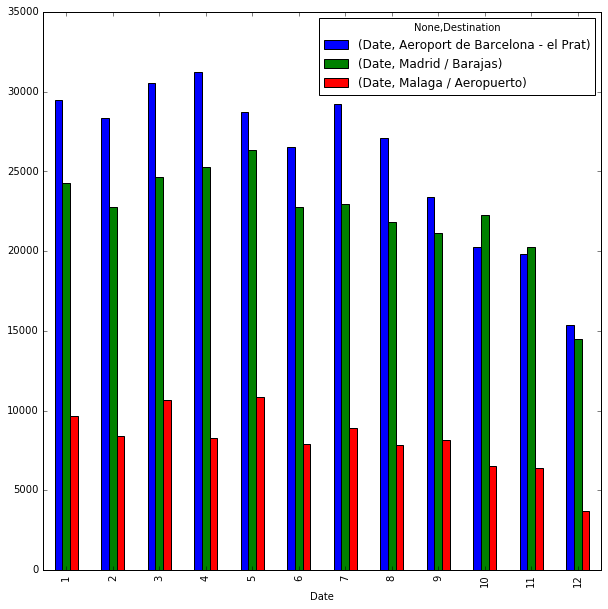

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
gb.unstack(level=0).plot(kind='bar', subplots=False, ax=ax)

# Fourth exercise: match searches with bookings
For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). 

For instance, search and booking origin and destination should match. 

For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 

Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

Bonus point: Solving this problem using pandas (instead of any other approach)

In [4]:
pd.set_option('display.max_columns', None)
dataB

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
5,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,DEN,US,LGA,NYC,US,DEN,DEN,US,DEN,DEN,US,LGA,NYC,US,DENLGA,DENNYC,USUS,0,DENLGA,FK,W,Y,2013-04-07 10:23:00,2013-04-07 16:14:24,1,2013,3,NULL
6,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,DEN,US,LGA,NYC,US,DEN,DEN,US,LGA,NYC,US,DEN,DEN,US,DENLGA,DENNYC,USUS,0,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
7,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,SIN,SIN,SG,HND,TYO,JP,NRT,TYO,JP,SIN,SIN,SG,NRTSIN,SINTYO,JPSG,1,NRTSIN,XR,Q,Y,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL
8,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,SIN,SIN,SG,HND,TYO,JP,SIN,SIN,SG,PEN,PEN,MY,PENSIN,PENSIN,MYSG,1,SINPEN,WS,Y,Y,2013-04-16 15:45:00,2013-04-16 17:15:29,2,2013,3,NULL
9,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,SIN,SIN,SG,HND,TYO,JP,PEN,PEN,MY,BKK,BKK,TH,BKKPEN,BKKPEN,MYTH,1,PENBKK,EQ,Y,Y,2013-04-18 08:00:00,2013-04-18 08:53:56,2,2013,3,NULL


In [16]:
pd.set_option('display.max_columns', None)
dataS

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1,2,IAH,BLR,2013-02-14,NaN,NaN,BLR,IAH,2013-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1,2,CPH,PAR,2013-03-02,NaN,NaN,PAR,CPH,2013-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1,2,PAR,DUB,2013-02-12,NaN,NaN,DUB,PAR,2013-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1,2,DUS,ACE,2013-03-30,NaN,NaN,ACE,DUS,2013-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,BGW,2013-02-26,NaN,NaN,BGW,FRA,2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ


In [3]:
def check(x):
    try:
        return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date()
    except ValueError: 
        return datetime(1970, 1, 1)

In [4]:
chunksize = 200000
j = 1
index_start = 1

for chunk in pd.read_csv('Data/bookings.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    
    chunk = chunk.rename(columns={c: c.replace(' ', '') for c in chunk.columns}) # Remove spaces from columns
    chunk['check'] = 0 #feature check created to find wrong values
    chunk['check'] = chunk['brd_time'].apply(check)
    chunk = chunk[chunk['check'] != datetime(1970,1,1)].drop('check', axis = 1) #Delete bred_time values uncorrect 
    chunk['brd_time'] = pd.to_datetime(chunk['brd_time']).apply(lambda x: x.date())
    
    
    for col in ['arr_port', 'dep_port']:
        if chunk.dtypes[col].name == 'object':
            chunk[col] = chunk[col].map(lambda row:strip(row))
            
    if j == 1:
        chunk[['arr_port', 'dep_port','brd_time', 'pos_oid']].to_csv('Data/BookingsExo4.csv', mode='w',index=False)
    else:
        chunk[['arr_port', 'dep_port','brd_time','pos_oid']].to_csv('Data/BookingsExo4.csv', mode='a',index=False, header = None)
    
    print(str(j)+" chunk saving in BookingsExo4.csv")
    j=j+1
    
    del chunk

1 chunk saving in Booking csv
2 chunk saving in Booking csv
3 chunk saving in Booking csv
4 chunk saving in Booking csv
5 chunk saving in Booking csv
6 chunk saving in Booking csv
7 chunk saving in Booking csv
8 chunk saving in Booking csv
9 chunk saving in Booking csv
10 chunk saving in Booking csv
11 chunk saving in Booking csv
12 chunk saving in Booking csv
13 chunk saving in Booking csv
14 chunk saving in Booking csv
15 chunk saving in Booking csv
16 chunk saving in Booking csv
17 chunk saving in Booking csv
18 chunk saving in Booking csv
19 chunk saving in Booking csv
20 chunk saving in Booking csv
21 chunk saving in Booking csv
22 chunk saving in Booking csv
23 chunk saving in Booking csv
24 chunk saving in Booking csv
25 chunk saving in Booking csv
26 chunk saving in Booking csv
27 chunk saving in Booking csv
28 chunk saving in Booking csv
29 chunk saving in Booking csv
30 chunk saving in Booking csv
31 chunk saving in Booking csv
32 chunk saving in Booking csv
33 chunk saving i

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [11]:
chunksize = 200000
j = 1
index_start = 1

for chunk in pd.read_csv('Data/searches.csv', chunksize=chunksize, iterator=True, encoding='utf-8', sep ='^'):
    
    chunk['Seg1Date'] = pd.to_datetime(chunk['Seg1Date']).apply(lambda x: x.date())
    
    if j == 1:
        chunk[['Destination', 'Origin','Seg1Date', 'OfficeID']].to_csv('Data/SearchesExo4.csv', mode='w',index=False)
    else:
        chunk[['Destination', 'Origin','Seg1Date', 'OfficeID']].to_csv('Data/SearchesExo4.csv', mode='a',index=False, header = None)
        
    print(str(j)+" chunk saving in SearchesExo4.csv")
    j=j+1
    del chunk

1 chunk saving in SearchesExo4.csv
2 chunk saving in SearchesExo4.csv
3 chunk saving in SearchesExo4.csv
4 chunk saving in SearchesExo4.csv
5 chunk saving in SearchesExo4.csv
6 chunk saving in SearchesExo4.csv
7 chunk saving in SearchesExo4.csv

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)
C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)



8 chunk saving in SearchesExo4.csv
9 chunk saving in SearchesExo4.csv
10 chunk saving in SearchesExo4.csv
11 chunk saving in SearchesExo4.csv
12 chunk saving in SearchesExo4.csv
13 chunk saving in SearchesExo4.csv
14 chunk saving in SearchesExo4.csv
15 chunk saving in SearchesExo4.csv
16 chunk saving in SearchesExo4.csv
17 chunk saving in SearchesExo4.csv
18 chunk saving in SearchesExo4.csv
19 chunk saving in SearchesExo4.csv
20 chunk saving in SearchesExo4.csv
21 chunk saving in SearchesExo4.csv
22 chunk saving in SearchesExo4.csv
23 chunk saving in SearchesExo4.csv
24 chunk saving in SearchesExo4.csv
25 chunk saving in SearchesExo4.csv
26 chunk saving in SearchesExo4.csv
27 chunk saving in SearchesExo4.csv
28 chunk saving in SearchesExo4.csv
29 chunk saving in SearchesExo4.csv
30 chunk saving in SearchesExo4.csv
31 chunk saving in SearchesExo4.csv
32 chunk saving in SearchesExo4.csv
33 chunk saving in SearchesExo4.csv
34 chunk saving in SearchesExo4.csv
35 chunk saving in SearchesEx

C:\Users\miou\Anaconda2\lib\site-packages\ipykernel\ipkernel.py:175: DtypeWarning: Columns (40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  shell.run_cell(code, store_history=store_history, silent=silent)


In [2]:
dfB = pd.read_csv('Data/BookingsExo4.csv')

In [ ]:
chunksize = 5000000
j = 1
index_start = 1

for chunk in pd.read_csv('Data/SearchesExo4.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    chunk.index += index_start
    chunk['booked'] = 0
    chunk['index_col'] = chunk.index #keep index from initial file to find searches ended up on a booking
    result = pd.merge(dfB, chunk, right_on=['Seg1Date','Origin','Destination',"OfficeID"], left_on=['brd_time','dep_port','arr_port',"pos_oid"])
   
    for index, row in result.iterrows():
        chunk.loc[chunk["index_col"]==row["index_col"],'booked']=1 #result's row
    
    if j == 1:
        result.to_csv('Data/ResultExo4.csv', mode='w',index=False)
        chunk.to_csv('Data/AllSearchesResultsExo4.csv', mode='w',index=False)
    else:
        result.to_csv('Data/ResultExo4.csv', mode='a',index=False, header = None)
        chunk.to_csv('Data/AllSearchesResultsExo4.csv', mode='a',index=False,header = None)
        
    print(str(j)+" chunk result from merge saving in ResultExo4.csv")
    print(str(j)+" all searches result saving in AllSearchesResultsExo4.csv")
    j=j+1
    
    index_start = chunk.index[-1] + 1
    del result
    del chunk

In [7]:
result = pd.read_csv("Data/ResultExo4.csv")

In [8]:
result

,arr_port,dep_port,brd_time,pos_oid,Destination,Origin,Seg1Date,OfficeID,booked,index_col
0,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,70953
1,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,429953
2,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,788953
3,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,1147953
4,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,1506963
5,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,1865983
6,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,2224983
7,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,2583983
8,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,2942983
9,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,FRA,HAM,2013-03-20,b0914bf85a8c69e6ad1816675ba871cc,0,3301993


# Bonus exercise: write a Web Service

Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output). The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X.

In [13]:
df_ws = pd.read_sql_query('SELECT arr_port, sum(pax) as `sum`'
                       'FROM bookings '
                       'GROUP BY arr_port ', disk_engine)

In [20]:
all_arr = df_ws.sort_values('sum',ascending = False)

In [35]:
def get_city(code):
    try:
        return geo_a.get(code,"name")
    except KeyError:
        return ""
    
geo_a = GeoBase(data='airports', verbose=False)
all_arr['arr_city'] = all_arr['arr_port'].map(get_city)

In [43]:
from bottle import route, run

@route('/DataChallenge/<n>')
def index(n):
    return all_arr[:int(n)].to_json(orient='records')

run(host='localhost', port=8080)

Bottle v0.12.9 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [17/Feb/2016 16:50:02] "GET /DataChallenge/3 HTTP/1.1" 200 227
127.0.0.1 - - [17/Feb/2016 16:50:16] "GET /DataChallenge/20 HTTP/1.1" 200 1497
